In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Data Summary
    - Checking for missing values,duplicates,data types

In [56]:
df = pd.read_csv('Sales_Data.csv')
df

,product_name,product_category,price,inventory_level,supplier_name,supplier_contact,date,order_lead_time,demand_quantity,demand_trend,seasonal_discount,Seasonality Factors,weather_condition,product_ID
0,Instant Pot,Kitchen,717.81,7084,Fliptune,250-221-0942,3/31/2022,21,8707,37,0.03,holiday,sunny,10001
1,Wrap Jumpsuit,Clothing - Jumpsuits,583.34,8805,Tagpad,258-931-5908,12/19/2023,14,42481,81,0.00,NAN,sunny,11002
2,Spinach and Ricotta Ravioli,Food - Pasta,707.18,1835,Lazzy,961-476-2675,9/1/2023,22,56241,79,0.40,NAN,sunny,12003
3,Maple Pecan Pancake Mix,Food - Breakfast,417.80,3644,Katz,453-861-4505,5/14/2024,4,23887,26,0.25,festival,rainy,13004
4,Egg Noodles,Food - Grains,868.24,1820,Linkbridge,801-909-8304,5/2/2024,22,70465,-26,0.22,NAN,rainy,14005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Cauliflower Crust Pizza,Food - Freezer,275.87,1406,Oba,907-315-9581,3/14/2023,12,56694,-50,0.12,holiday,rainy,80226
551,Organic Green Apples,Food - Produce,773.43,398,Oyoyo,962-966-5004,10/7/2023,30,46883,3,0.03,NAN,cloudy,28472
552,Outdoor Mosquito Repellent Lantern,Outdoor,711.85,1156,Dabjam,379-372-2119,3/3/2024,15,41087,-26,0.02,festival,cloudy,44473
553,Insulated Cooler,Outdoor,9.54,9377,Blogtag,590-527-6181,6/24/2023,3,16950,29,0.00,NAN,sunny,44474


In [57]:
# Checking for missing Values
df.isnull().sum()

product_name           0
product_category       0
price                  0
inventory_level        0
supplier_name          0
supplier_contact       0
date                   0
order_lead_time        0
demand_quantity        0
demand_trend           0
seasonal_discount      0
Seasonality Factors    0
weather_condition      0
product_ID             0
dtype: int64

In [58]:
df.describe()

,price,inventory_level,order_lead_time,demand_quantity,demand_trend,seasonal_discount,product_ID
count,555.000000,555.000000,555.000000,555.000000,555.00000,555.000000,555.000000
mean,501.476342,4824.998198,15.870270,51168.693694,0.94955,0.249279,37762.461261
std,294.829449,2824.690501,8.603863,28049.320391,57.90632,0.142291,22561.595042
min,0.830000,18.000000,1.000000,432.000000,-100.00000,0.000000,10001.000000
25%,249.095000,2411.500000,8.000000,27688.000000,-50.00000,0.125000,20338.000000
50%,502.110000,4831.000000,16.000000,50546.000000,1.00000,0.250000,33190.000000
75%,755.590000,7222.000000,23.000000,75246.000000,53.50000,0.370000,48450.000000
max,997.760000,9974.000000,30.000000,99813.000000,100.00000,0.500000,105443.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         555 non-null    object 
 1   product_category     555 non-null    object 
 2   price                555 non-null    float64
 3   inventory_level      555 non-null    int64  
 4   supplier_name        555 non-null    object 
 5   supplier_contact     555 non-null    object 
 6   date                 555 non-null    object 
 7   order_lead_time      555 non-null    int64  
 8   demand_quantity      555 non-null    int64  
 9   demand_trend         555 non-null    int64  
 10  seasonal_discount    555 non-null    float64
 11  Seasonality Factors  555 non-null    object 
 12  weather_condition    555 non-null    object 
 13  product_ID           555 non-null    int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 60.8+ KB


In [60]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
550    False
551    False
552    False
553    False
554    False
Length: 555, dtype: bool

In [61]:
# Convert date to DateTime
df['Date'] = pd.to_datetime(df['date'])
df

,product_name,product_category,price,inventory_level,supplier_name,supplier_contact,date,order_lead_time,demand_quantity,demand_trend,seasonal_discount,Seasonality Factors,weather_condition,product_ID,Date
0,Instant Pot,Kitchen,717.81,7084,Fliptune,250-221-0942,3/31/2022,21,8707,37,0.03,holiday,sunny,10001,2022-03-31
1,Wrap Jumpsuit,Clothing - Jumpsuits,583.34,8805,Tagpad,258-931-5908,12/19/2023,14,42481,81,0.00,NAN,sunny,11002,2023-12-19
2,Spinach and Ricotta Ravioli,Food - Pasta,707.18,1835,Lazzy,961-476-2675,9/1/2023,22,56241,79,0.40,NAN,sunny,12003,2023-09-01
3,Maple Pecan Pancake Mix,Food - Breakfast,417.80,3644,Katz,453-861-4505,5/14/2024,4,23887,26,0.25,festival,rainy,13004,2024-05-14
4,Egg Noodles,Food - Grains,868.24,1820,Linkbridge,801-909-8304,5/2/2024,22,70465,-26,0.22,NAN,rainy,14005,2024-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Cauliflower Crust Pizza,Food - Freezer,275.87,1406,Oba,907-315-9581,3/14/2023,12,56694,-50,0.12,holiday,rainy,80226,2023-03-14
551,Organic Green Apples,Food - Produce,773.43,398,Oyoyo,962-966-5004,10/7/2023,30,46883,3,0.03,NAN,cloudy,28472,2023-10-07
552,Outdoor Mosquito Repellent Lantern,Outdoor,711.85,1156,Dabjam,379-372-2119,3/3/2024,15,41087,-26,0.02,festival,cloudy,44473,2024-03-03
553,Insulated Cooler,Outdoor,9.54,9377,Blogtag,590-527-6181,6/24/2023,3,16950,29,0.00,NAN,sunny,44474,2023-06-24


# Exploratory Data Analysis

## Demand and Price Distribution

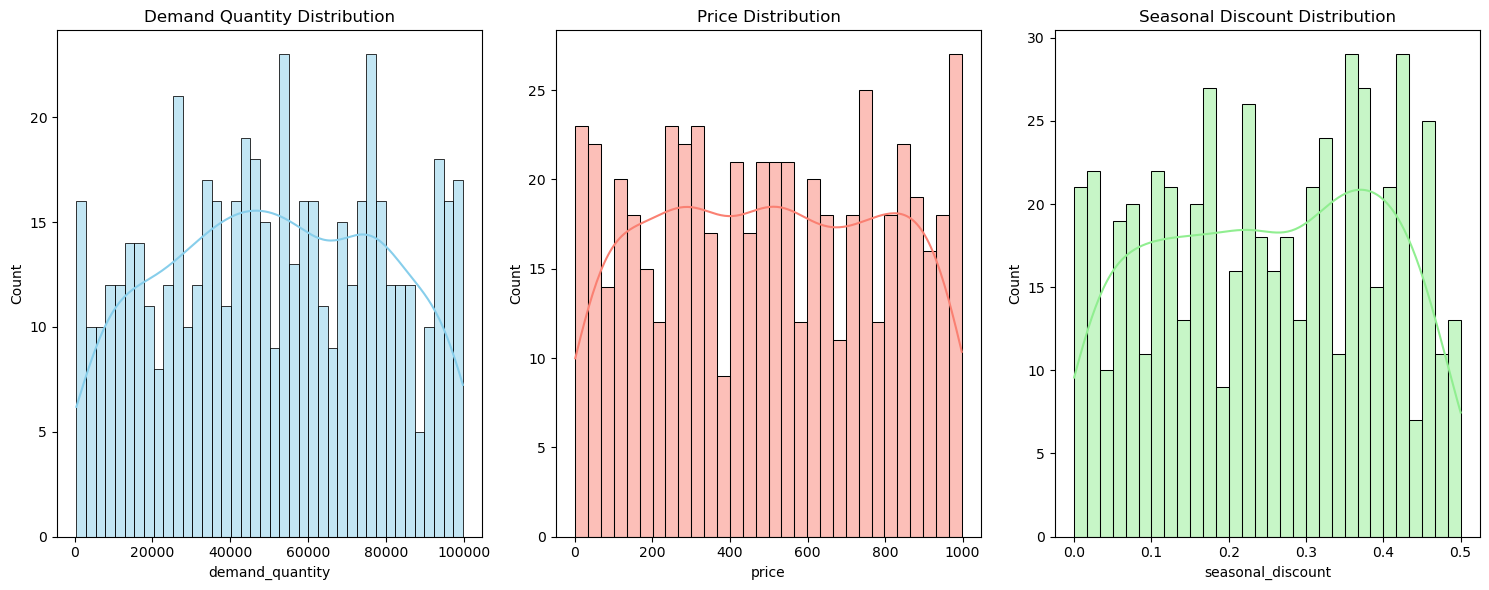

In [21]:
plt.figure(figsize = (15,6))

# Demand Quantity
plt.subplot(1, 3, 1)
sns.histplot(df['demand_quantity'], kde=True, bins=40, color='skyblue')
plt.title('Demand Quantity Distribution')

# Price
plt.subplot(1, 3, 2)
sns.histplot(df['price'], kde=True, bins=30, color='salmon')
plt.title('Price Distribution')

# Seasonal Discount
plt.subplot(1, 3, 3)
sns.histplot(df['seasonal_discount'], kde=True, bins=30, color='lightgreen')
plt.title('Seasonal Discount Distribution')

plt.tight_layout()
plt.show()

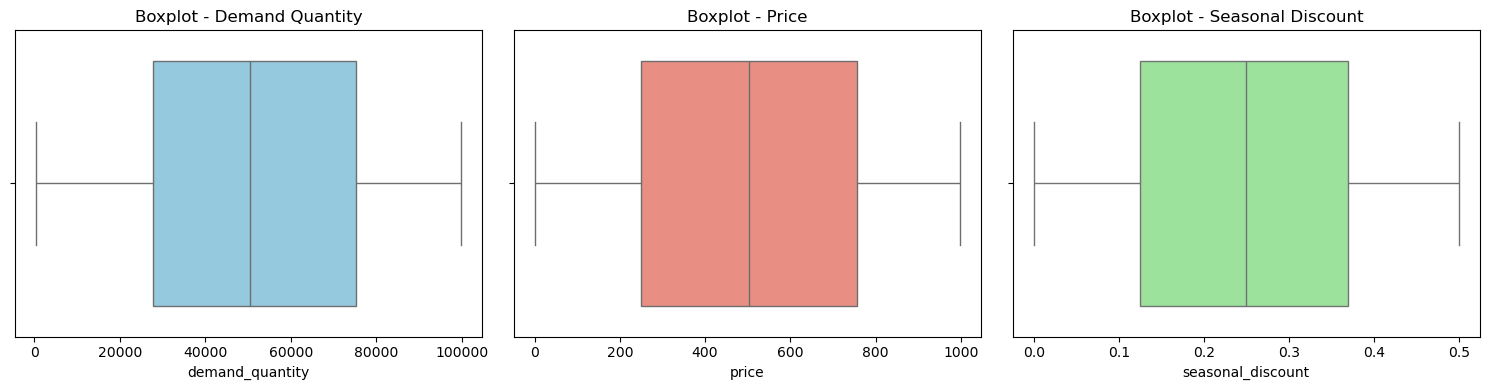

In [22]:
# Boxplots for Outlier Detection

plt.figure(figsize=(15, 4))

# Demand Quantity
plt.subplot(1, 3, 1)
sns.boxplot(x=df['demand_quantity'], color='skyblue')
plt.title('Boxplot - Demand Quantity')

# Price
plt.subplot(1, 3, 2)
sns.boxplot(x=df['price'], color='salmon')
plt.title('Boxplot - Price')

# Seasonal Discount
plt.subplot(1, 3, 3)
sns.boxplot(x=df['seasonal_discount'], color='lightgreen')
plt.title('Boxplot - Seasonal Discount')

plt.tight_layout()
plt.show()

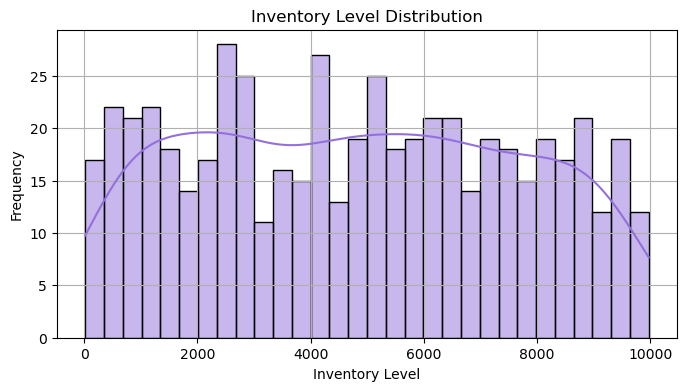

In [24]:
# Inventory Levels

plt.figure(figsize=(8, 4))
sns.histplot(df['inventory_level'], kde=True, bins=30, color='mediumpurple')
plt.title('Inventory Level Distribution')
plt.xlabel('Inventory Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


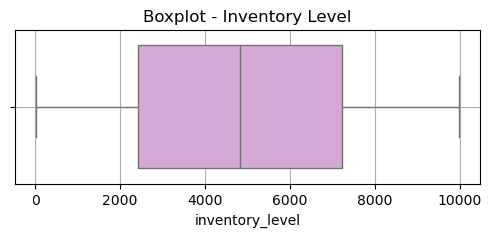

In [25]:
# Boxplot for Outlier Detection

plt.figure(figsize=(6, 2))
sns.boxplot(x=df['inventory_level'], color='plum')
plt.title('Boxplot - Inventory Level')
plt.grid(True)
plt.show()


In [26]:
# Potential Overstocks

# Calculate threshold for overstocking (e.g., 95th percentile)
overstock_threshold = df['inventory_level'].quantile(0.95)

# Products with unusually high inventory
overstocked_items = df[df['inventory_level'] > overstock_threshold]

print(f"Overstock Threshold (95th percentile): {overstock_threshold}")
print(f"Number of Overstocked Items: {overstocked_items.shape[0]}")


Overstock Threshold (95th percentile): 9354.8
Number of Overstocked Items: 28


# Correlate Overstock with Low Demand

In [27]:

# Join overstocked items with demand
overstock_demand = overstocked_items[['product_name', 'inventory_level', 'demand_quantity']]

# Check items with low demand (e.g., below 25th percentile)
low_demand_threshold = df['demand_quantity'].quantile(0.25)

low_demand_overstock = overstock_demand[overstock_demand['demand_quantity'] < low_demand_threshold]

print(f"Number of overstocked items with low demand: {low_demand_overstock.shape[0]}")
low_demand_overstock.sort_values(by='inventory_level', ascending=False).head(10)


Number of overstocked items with low demand: 8


,product_name,inventory_level,demand_quantity
511,Digital Kitchen Timer,9969,13384
540,Almond Flour Biscuits,9709,3084
15,Aged White Cheddar Popcorn,9673,27132
455,Sea Salt Caramel Popcorn,9595,2342
104,Bamboo Toothbrush,9444,12136
536,Classic Bagels,9408,18665
113,Compact Umbrella,9383,14051
553,Insulated Cooler,9377,16950


# Correlate Overstock with High Price

In [28]:
# Join with price
overstock_price = overstocked_items[['product_name', 'inventory_level', 'price']]

# Define high price threshold (e.g., 75th percentile)
high_price_threshold = df['price'].quantile(0.75)

high_price_overstock = overstock_price[overstock_price['price'] > high_price_threshold]

print(f"Number of overstocked items with high price: {high_price_overstock.shape[0]}")
high_price_overstock.sort_values(by='price', ascending=False).head(10)


Number of overstocked items with high price: 6


,product_name,inventory_level,price
355,Carrot and Celery Sticks,9477,981.22
371,High-Speed HDMI Cable,9874,966.87
469,Acoustic Guitar,9463,918.51
413,Portable Speakers,9887,891.13
391,Marinara Parmesan Baked Ziti,9457,882.19
14,Maple Oatmeal,9359,871.92


# Combine Both Conditions

In [29]:
# Check items that are both overstocked AND have low demand AND high price
overstocked_combined = overstocked_items[
    (overstocked_items['demand_quantity'] < low_demand_threshold) &
    (overstocked_items['price'] > high_price_threshold)
]

print(f"Number of overstocked items with low demand and high price: {overstocked_combined.shape[0]}")
overstocked_combined[['product_name', 'inventory_level', 'demand_quantity', 'price']].head(10)


Number of overstocked items with low demand and high price: 0


,product_name,inventory_level,demand_quantity,price


# Inventory vs Demand

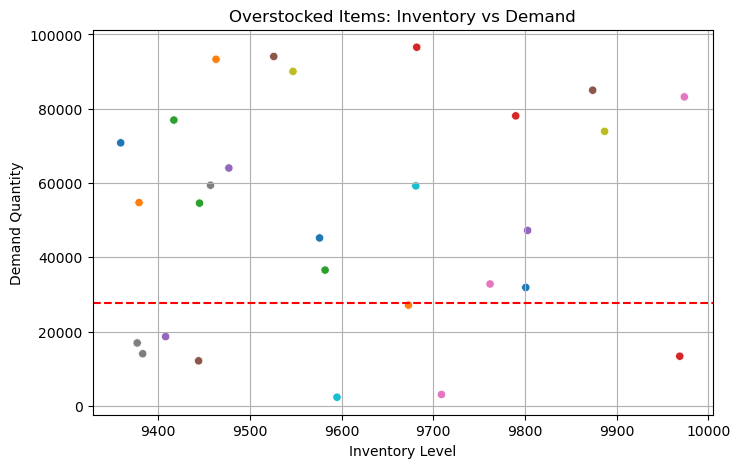

In [30]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=overstocked_items,
    x='inventory_level',
    y='demand_quantity',
    hue='product_name',  # Optional: helps differentiate items
    palette='tab10',
    legend=False
)
plt.axhline(low_demand_threshold, color='red', linestyle='--', label='Low Demand Threshold')
plt.title('Overstocked Items: Inventory vs Demand')
plt.xlabel('Inventory Level')
plt.ylabel('Demand Quantity')
plt.grid(True)
plt.show()


# Scatter Plot: Inventory vs Price

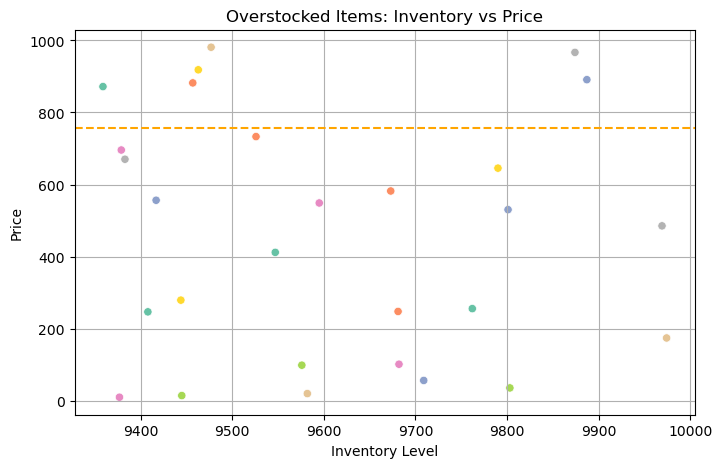

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=overstocked_items,
    x='inventory_level',
    y='price',
    hue='product_name',
    palette='Set2',
    legend=False
)
plt.axhline(high_price_threshold, color='orange', linestyle='--', label='High Price Threshold')
plt.title('Overstocked Items: Inventory vs Price')
plt.xlabel('Inventory Level')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# Top Overstocked Items with Low Demand

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\3478155936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


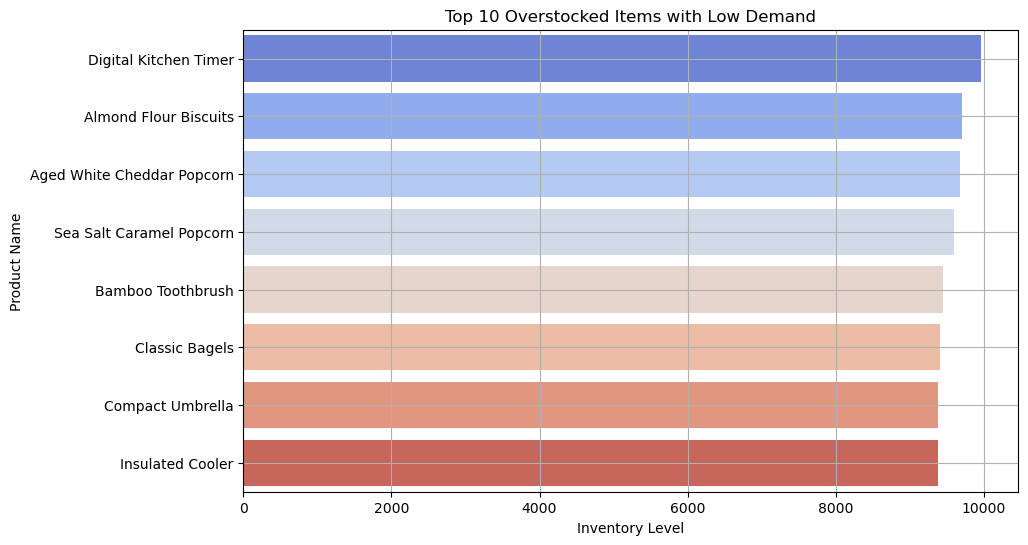

In [32]:
plt.figure(figsize=(10, 6))
top_low_demand = low_demand_overstock.sort_values(by='inventory_level', ascending=False).head(10)
sns.barplot(
    data=top_low_demand,
    x='inventory_level',
    y='product_name',
    palette='coolwarm'
)
plt.title('Top 10 Overstocked Items with Low Demand')
plt.xlabel('Inventory Level')
plt.ylabel('Product Name')
plt.grid(True)
plt.show()


# Sales Trends Over Time

## A. Group by Date: Total Demand Over Time

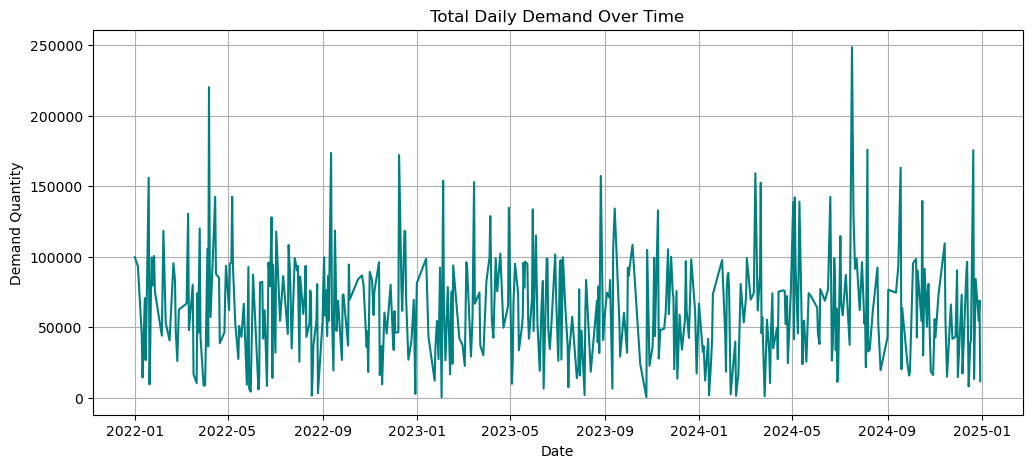

In [36]:
# Group by date
daily_sales = df.groupby('Date')['demand_quantity'].sum().reset_index()

# Plot total demand over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=daily_sales, x='Date', y='demand_quantity', color='teal')
plt.title('Total Daily Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Demand Quantity')
plt.grid(True)
plt.show()


## B. Monthly Trend Analysis

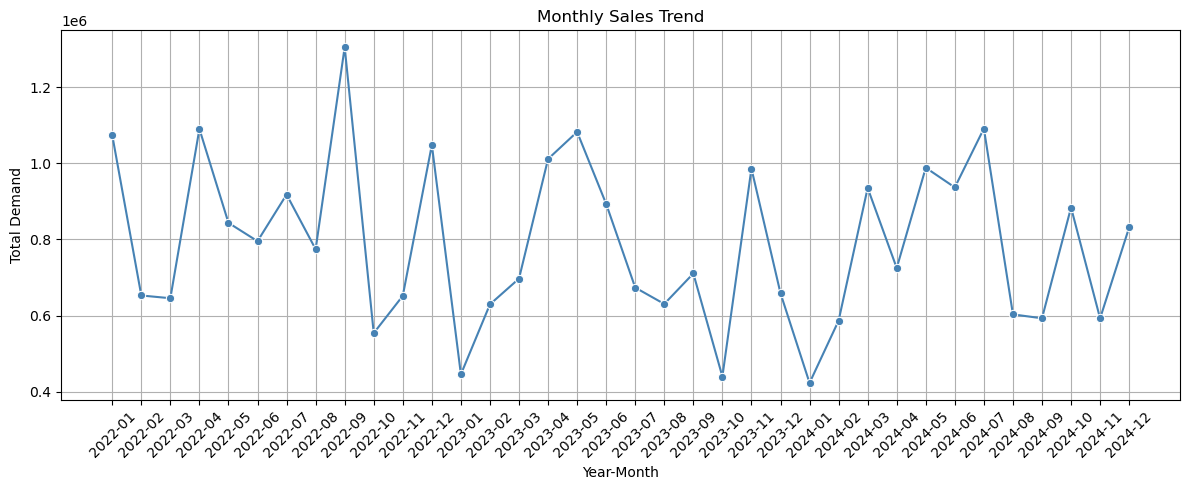

In [38]:
# Extract year and month
df['year_month'] = df['Date'].dt.to_period('M')

# Group by month
monthly_sales = df.groupby('year_month')['demand_quantity'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_sales, x='year_month', y='demand_quantity', marker='o', color='steelblue')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Demand')
plt.grid(True)
plt.tight_layout()
plt.show()


## C. Quarterly Seasonality Check

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\3967481531.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quarterly_sales, x='quarter', y='demand_quantity', palette='muted')


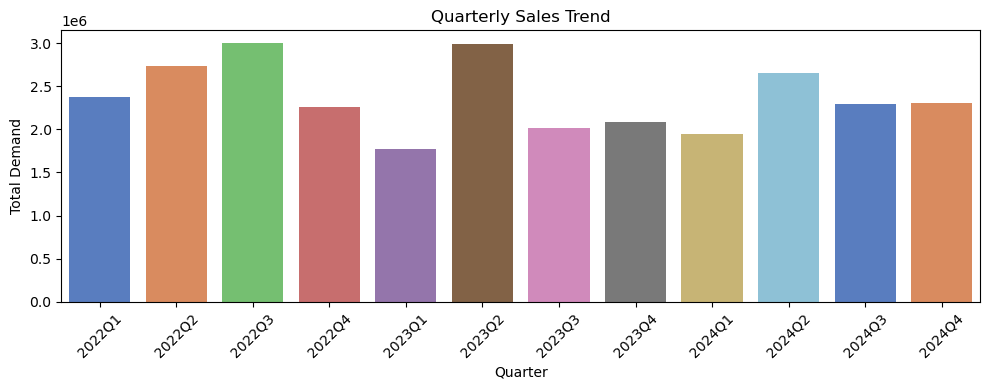

In [42]:
# Extract year and quarter
df['quarter'] = df['Date'].dt.to_period('Q')
quarterly_sales = df.groupby('quarter')['demand_quantity'].sum().reset_index()
quarterly_sales['quarter'] = quarterly_sales['quarter'].astype(str)

# Plot
plt.figure(figsize=(10, 4))
sns.barplot(data=quarterly_sales, x='quarter', y='demand_quantity', palette='muted')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
#plt.grid(True)
plt.tight_layout()
plt.show()


# Trend Over Time by product_category

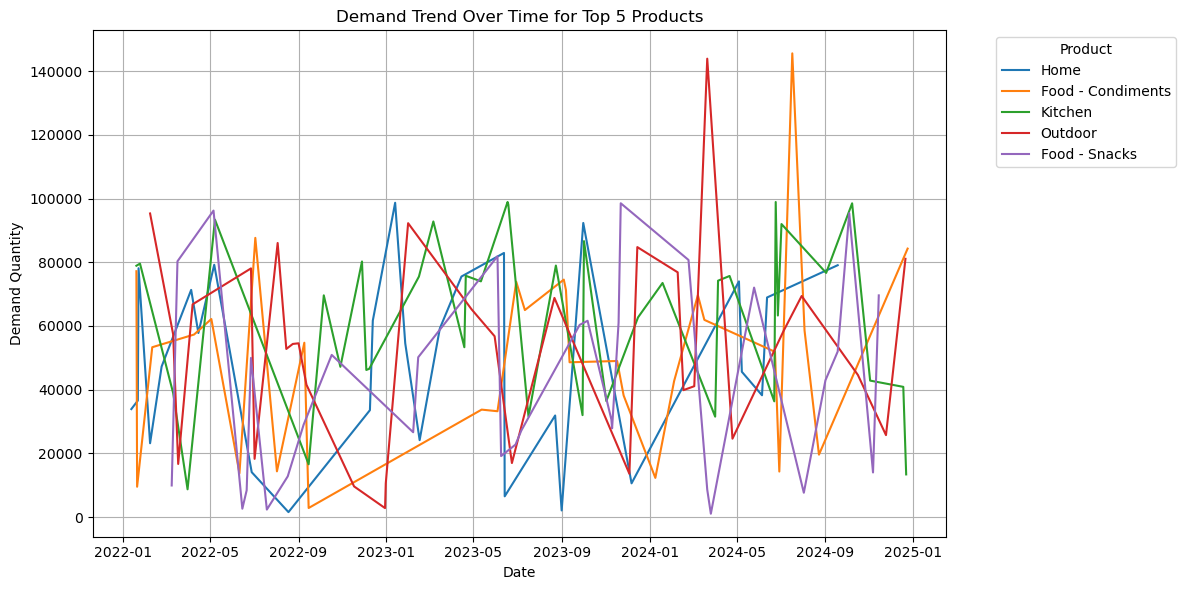

In [45]:
# Step 1: Get top 5 products by total demand
top_n = 5
top_products = df.groupby('product_category')['demand_quantity'].sum().nlargest(top_n).index

# Step 2: Filter time series data for only those products
product_trend = df.groupby(['Date', 'product_category'])['demand_quantity'].sum().reset_index()
filtered_trend = product_trend[product_trend['product_category'].isin(top_products)]

# Step 3: Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=filtered_trend,
    x='Date',
    y='demand_quantity',
    hue='product_category',
    palette='tab10'
)
plt.title(f'Demand Trend Over Time for Top {top_n} Products')
plt.xlabel('Date')
plt.ylabel('Demand Quantity')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


## Compare Demand With and Without Events

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\4175884859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


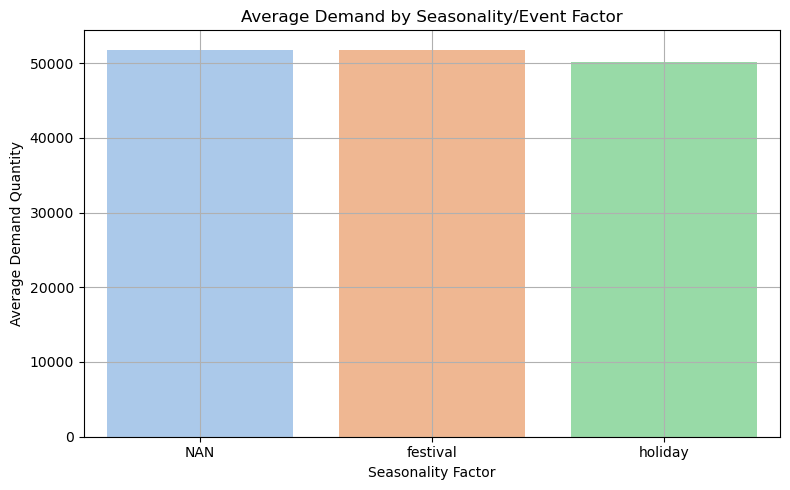

In [50]:
# Group by seasonality factor
seasonality_impact = df.groupby('Seasonality Factors')['demand_quantity'].mean().reset_index()

# Bar Plot: Average demand by event type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=seasonality_impact,
    x='Seasonality Factors',
    y='demand_quantity',
    palette='pastel'
)
plt.title('Average Demand by Seasonality/Event Factor')
plt.xlabel('Seasonality Factor')
plt.ylabel('Average Demand Quantity')
plt.grid(True)
plt.tight_layout()
plt.show()


## Most Demanded Categories

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\3167614168.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


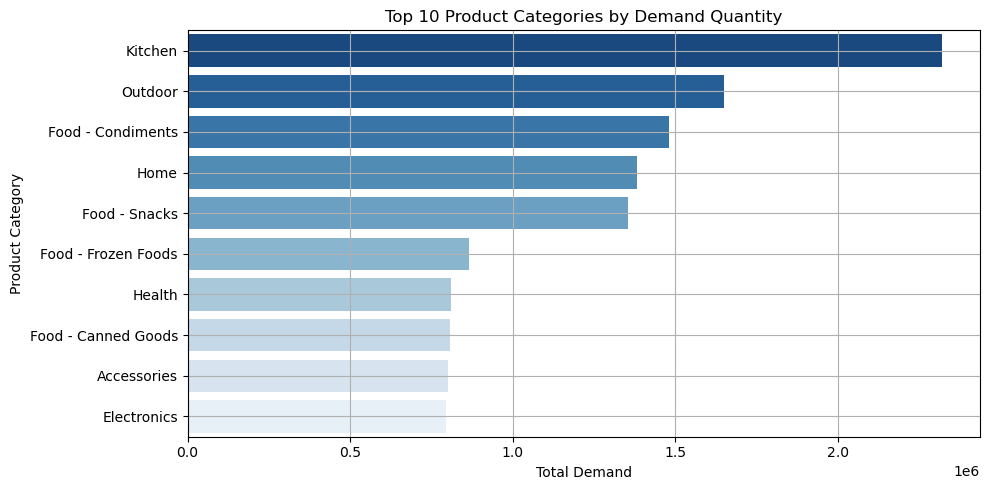

In [51]:
# Total demand by category
top_categories = df.groupby('product_category')['demand_quantity'].sum().reset_index().sort_values(by='demand_quantity', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_categories.head(10),
    x='demand_quantity',
    y='product_category',
    palette='Blues_r'
)
plt.title('Top 10 Product Categories by Demand Quantity')
plt.xlabel('Total Demand')
plt.ylabel('Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()


## Most Demanded Products

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\2973421541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


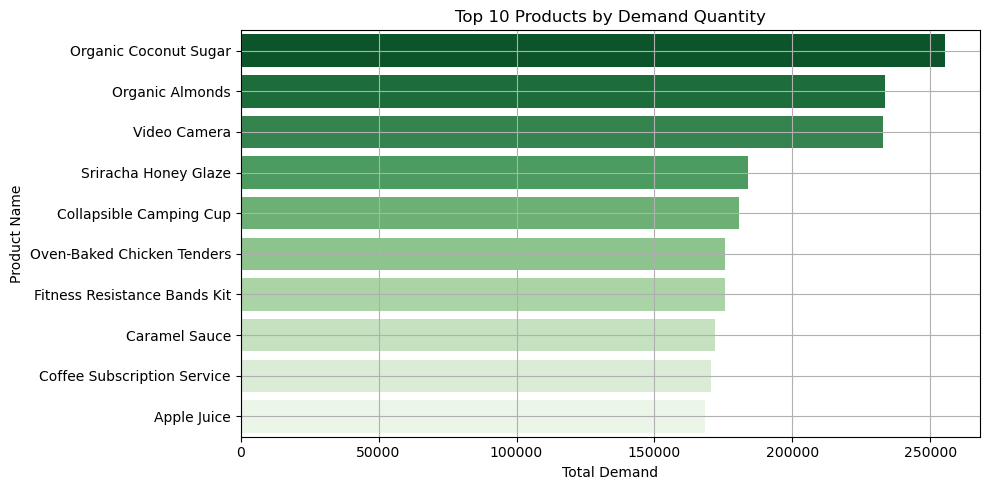

In [53]:
# Total demand by product
top_products = df.groupby('product_name')['demand_quantity'].sum().reset_index().sort_values(by='demand_quantity', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_products.head(10),
    x='demand_quantity',
    y='product_name',
    palette='Greens_r'
)
plt.title('Top 10 Products by Demand Quantity')
plt.xlabel('Total Demand')
plt.ylabel('Product Name')
plt.grid(True)
plt.tight_layout()
plt.show()


## Highest Revenue Generators

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\1126806806.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


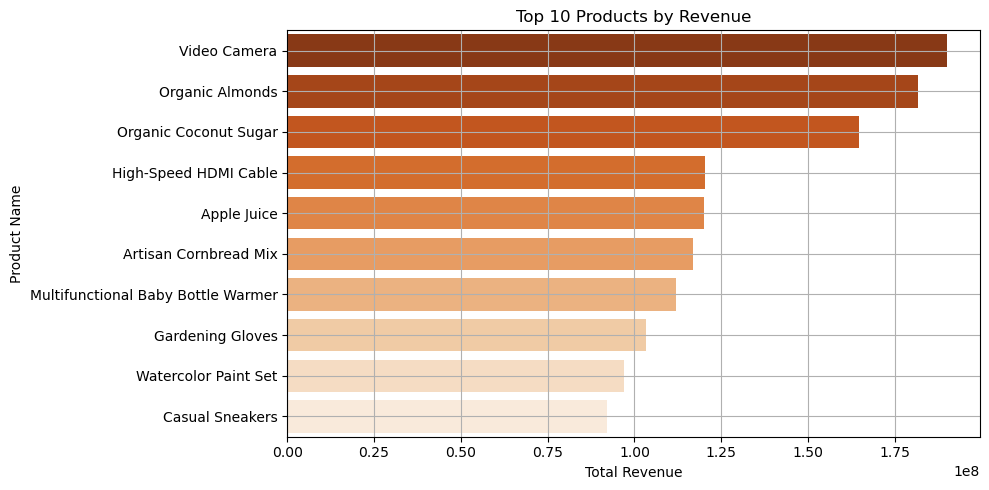

In [54]:
# Create revenue column
df['revenue'] = df['price'] * df['demand_quantity']

# Top revenue-generating products
top_revenue_products = df.groupby('product_name')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=top_revenue_products.head(10),
    x='revenue',
    y='product_name',
    palette='Oranges_r'
)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.grid(True)
plt.tight_layout()
plt.show()


## Demanding products at stockout Risk

Number of products at stockout risk: 26


C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\1711684668.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


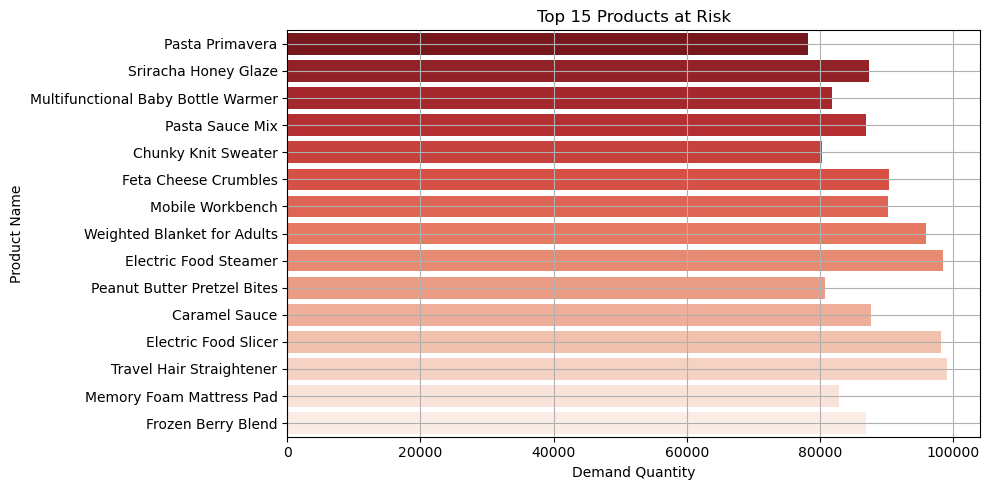

In [69]:
# Define thresholds using quantiles
high_demand_threshold = df['demand_quantity'].quantile(0.75)
low_inventory_threshold = df['inventory_level'].quantile(0.25)

# Filter products with high demand but low stock
at_risk_products = df[
    (df['demand_quantity'] > high_demand_threshold) &
    (df['inventory_level'] < low_inventory_threshold)
]

print(f"Number of products at stockout risk: {at_risk_products.shape[0]}")
at_risk_products[['product_name', 'demand_quantity', 'inventory_level']]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=at_risk_products.head(15),
    x='demand_quantity',
    y='product_name',
    palette='Reds_r'
)
plt.title('Top 15 Products at Risk')
plt.xlabel('Demand Quantity')
plt.ylabel('Product Name')
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlate Lead Time with Demand Spikes

C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\467296439.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


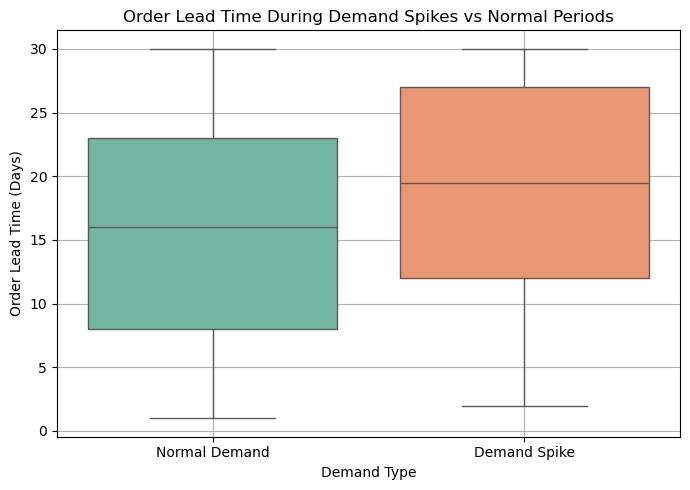

In [70]:
# Define high demand threshold
high_demand_threshold = df['demand_quantity'].quantile(0.9)

# Flag high-demand records
df['is_demand_spike'] = df['demand_quantity'] > high_demand_threshold

# Boxplot: Lead time during normal vs spike demand
plt.figure(figsize=(7, 5))
sns.boxplot(
    data=df,
    x='is_demand_spike',
    y='order_lead_time',
    palette='Set2'
)
plt.xticks([0, 1], ['Normal Demand', 'Demand Spike'])
plt.title('Order Lead Time During Demand Spikes vs Normal Periods')
plt.xlabel('Demand Type')
plt.ylabel('Order Lead Time (Days)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Weather Impact on Demand

In [71]:
# Group by weather and calculate average demand
weather_demand = df.groupby('weather_condition')['demand_quantity'].mean().reset_index().sort_values(by='demand_quantity', ascending=False)


C:\Users\Groot\AppData\Local\Temp\ipykernel_14016\608955133.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


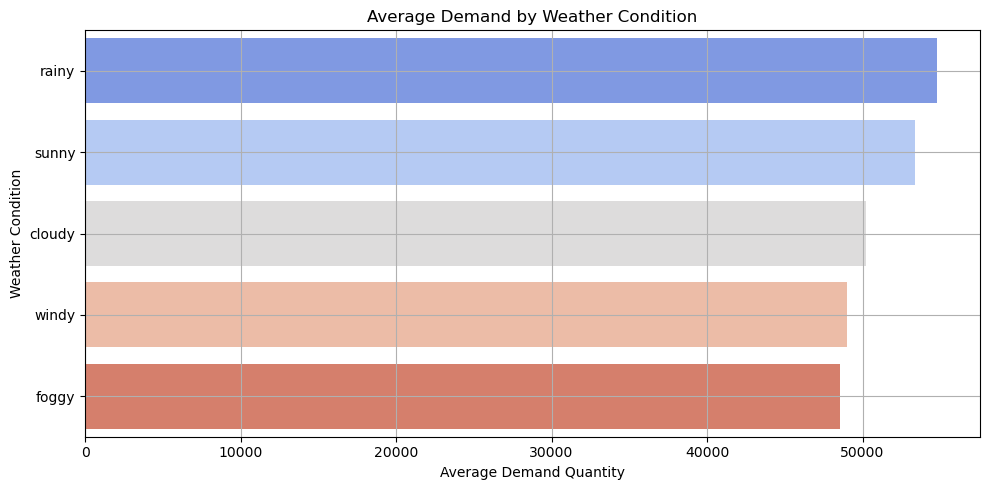

In [72]:
# Average Demand by Weather Condition
plt.figure(figsize=(10, 5))
sns.barplot(
    data=weather_demand,
    x='demand_quantity',
    y='weather_condition',
    palette='coolwarm'
)
plt.title('Average Demand by Weather Condition')
plt.xlabel('Average Demand Quantity')
plt.ylabel('Weather Condition')
plt.grid(True)
plt.tight_layout()
plt.show()
